# **PCA Manual Implementation:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/sample_data/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

Convert the data to data like mentioned in video.

In [13]:
df.drop(['id', 'Unnamed: 32', 'diagnosis'], axis= 1, inplace = True)

In [14]:
len(df.columns)

30

In [29]:
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Step 1: Standardization**

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X = scaler.fit_transform(df)

In [27]:
# just to verify

scaled_X.mean()

-6.826538293184326e-17

It is zero. Woah!

**Step 2: Covariance Matrix**

In [30]:
# apply covar matrix on features/columns only

covar_matrix = np.cov(scaled_X, rowvar = False)

In [31]:
# Get eigen vector and eigen values from this matrix

eigen_values, eigen_vectors = np.linalg.eig(covar_matrix)

In [32]:
eigen_vectors

array([[ 2.18902444e-01, -2.33857132e-01, -8.53124284e-03,
         4.14089623e-02, -3.77863538e-02,  1.87407904e-02,
         1.24088340e-01,  7.45229622e-03, -2.23109764e-01,
         9.54864432e-02,  4.14714866e-02,  5.10674568e-02,
         1.19672116e-02, -5.95061348e-02, -5.11187749e-02,
         1.50583883e-01, -2.02924255e-01, -1.46712338e-01,
        -2.25384659e-01, -7.02414091e-01,  2.11460455e-01,
        -2.11194013e-01, -1.31526670e-01,  1.29476396e-01,
         1.92264989e-02, -1.82579441e-01,  9.85526942e-02,
        -7.29289034e-02, -4.96986642e-02,  6.85700057e-02],
       [ 1.03724578e-01, -5.97060883e-02,  6.45499033e-02,
        -6.03050001e-01,  4.94688505e-02, -3.21788366e-02,
        -1.13995382e-02, -1.30674825e-01,  1.12699390e-01,
         2.40934066e-01, -3.02243402e-01,  2.54896423e-01,
         2.03461333e-01,  2.15600995e-02, -1.07922421e-01,
         1.57841960e-01,  3.87061187e-02,  4.11029851e-02,
        -2.97886446e-02, -2.73661018e-04, -1.05339342e-

In [20]:
len(eigen_vectors)

30

We got 30 eigen vectors. But, we need only one or two. Decide it with eigen values.

In [25]:
eigen_values

array([1.33049908e+01, 5.70137460e+00, 2.82291016e+00, 1.98412752e+00,
       1.65163324e+00, 1.20948224e+00, 6.76408882e-01, 4.77456255e-01,
       4.17628782e-01, 3.51310875e-01, 2.94433153e-01, 2.61621161e-01,
       2.41782421e-01, 1.57286149e-01, 9.43006956e-02, 8.00034045e-02,
       5.95036135e-02, 5.27114222e-02, 4.95647002e-02, 1.33279057e-04,
       7.50121413e-04, 1.59213600e-03, 6.91261258e-03, 8.19203712e-03,
       1.55085271e-02, 1.80867940e-02, 2.43836914e-02, 2.74877113e-02,
       3.12142606e-02, 3.00256631e-02])

In [36]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [37]:
sc = scaler.fit_transform(data['data'])

In [38]:
sc.mean()

-6.118909323768877e-16

In [39]:
covar_matrix = np.cov(sc, rowvar = False)

In [40]:
# Get eigen vector and eigen values from this matrix

eigen_values, eigen_vectors = np.linalg.eig(covar_matrix)

In [41]:
eigen_values

array([1.33049908e+01, 5.70137460e+00, 2.82291016e+00, 1.98412752e+00,
       1.65163324e+00, 1.20948224e+00, 6.76408882e-01, 4.77456255e-01,
       4.17628782e-01, 3.51310875e-01, 2.94433153e-01, 2.61621161e-01,
       2.41782421e-01, 1.57286149e-01, 9.43006956e-02, 8.00034045e-02,
       5.95036135e-02, 5.27114222e-02, 4.95647002e-02, 1.33279057e-04,
       7.50121413e-04, 1.59213600e-03, 6.91261258e-03, 8.19203712e-03,
       1.55085271e-02, 1.80867940e-02, 2.43836914e-02, 2.74877113e-02,
       3.12142606e-02, 3.00256631e-02])

Now, next step is to sort these eigen values. We need to sort the values and take the index of first two eigen values (if we want 2 PCA Components) so we can extract the eigen vectors of the same index. We can perform sorting+index_return using one function 'argsort'.

In [44]:
np.argsort(eigen_values)

array([19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 28, 18, 17, 16, 15, 14, 13,
       12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0])

In [45]:
np.argsort(eigen_values)[::-1]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 28, 29, 27, 26, 25, 24, 23, 22, 21, 20, 19])

In [46]:
num_components = 2

sorted_keys = np.argsort(eigen_values)[::-1][:num_components]

In [47]:
sorted_keys

array([0, 1])

In [48]:
# use eigen_vectors[:, sorted_keys] instead of eigen_values[sorted_keys],
# because eigen_vectors are vectors. So, we want all rows and features till
# sorted_keys mtlb 2.

eigen_values, eigen_vectors = eigen_values[sorted_keys], eigen_vectors[:, sorted_keys]

**Step 3: Projection of original features to eigen vectors**

In [49]:
principal_components = np.dot(scaled_X, eigen_vectors)

In [50]:
principal_components

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

Now, all data is reduced to 2D.

Let's plot it:

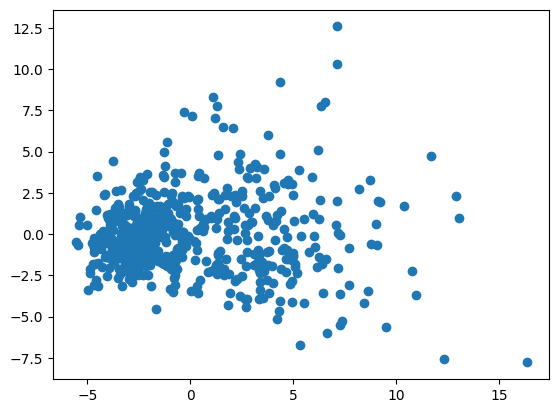

In [54]:
plt.scatter(principal_components[:,0], principal_components[:,1]);

We want to classify it then. We can the same data that we used with these commands, and through this, we can see the target labels that we will use to create hue on this scatterplot to visualize:

In [55]:
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
dataset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

It is in the form of dictionary so let's check its main keys.

In [56]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [57]:
dataset['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

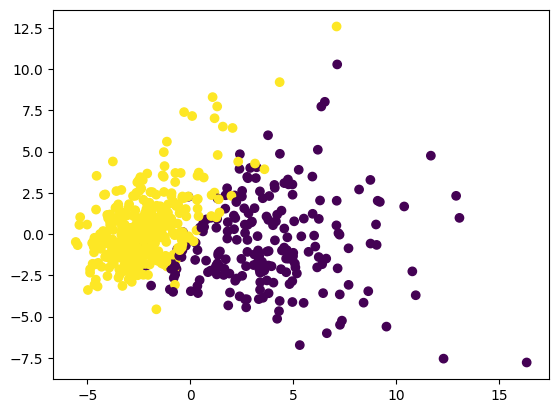

In [59]:
plt.scatter(principal_components[:,0], principal_components[:,1], c = dataset['target']);

Woah! the dataset is still showing clear separation between two classes even after converting it to 2D from 30D. Best!

# **PCA Using Scikit Learn:**

In [61]:
from sklearn.decomposition import PCA

model = PCA(n_components=2)
prinicpal_components_sklearn = model.fit_transform(scaled_X)

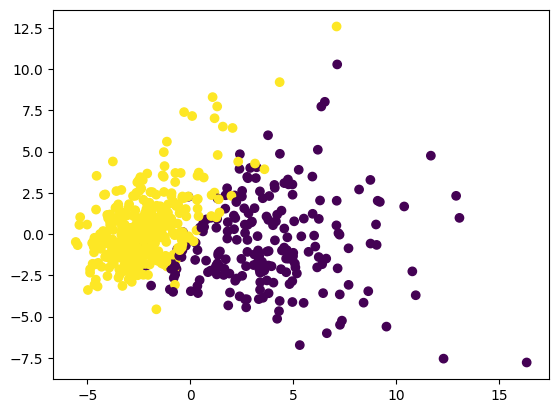

In [62]:
plt.scatter(prinicpal_components_sklearn[:,0], prinicpal_components_sklearn[:,1], c = dataset['target']);

In [64]:
model.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

We can even get the transformed df dataset from 30 features to 2 PCAs using the following method:

In [65]:
df_pca = pd.DataFrame(data = model.components_, index = ['PC1', 'PC2'], columns = df.columns)

In [66]:
df_pca

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
PC1,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
PC2,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


We can now even check heatmap to check importance of features.

<Axes: >

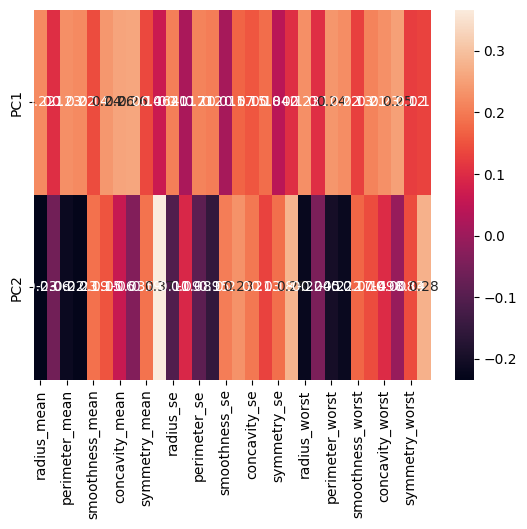

In [67]:
sns.heatmap(df_pca, annot=True)

In [68]:
model.explained_variance_ratio_

array([0.44272026, 0.18971182])

It tells that first PCA component shows 44% of the variance in data and second components tells 19%. So, in total, we have shown 63% variance of data. Ofcourse, 100% is only shown by original features means by using all 30 features. Lets make all 30 components then you can see the variance will be 100%.

In [69]:
model2 = PCA(n_components=30)
prinicpal_components_sklearn = model2.fit_transform(scaled_X)

In [70]:
model2.explained_variance_ratio_

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

In [71]:
np.sum(model2.explained_variance_ratio_)

1.0

See, 100% variance is shown with 30 components. But with it, the purpose of PCA ended.

But now the question is how many PCA will be best. Ho skta eh k me 3 ya 4 PCA use krn to me 80% tk variance show kr skun.

To get its answer, use elbow method.

In [74]:
explained_var = []

for n in range(1,30):
  model = PCA(n_components=n)
  prinicpal_components_sklearn = model.fit_transform(scaled_X)

  explained_var.append(np.sum(model.explained_variance_ratio_))

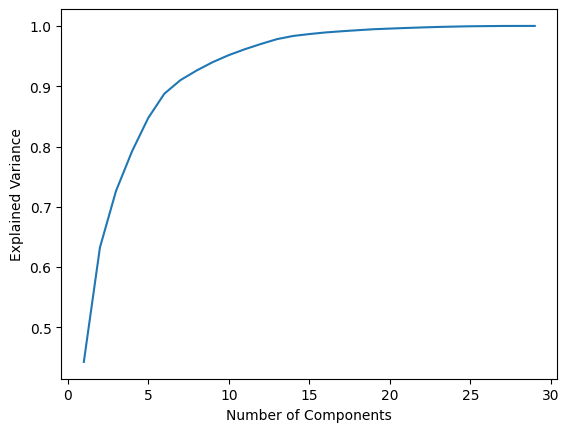

In [75]:
plt.plot(range(1,30), explained_var)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance');

It shows after 10, we almost didn't show more variance. So, we can use 10 PCAs to get at max variance shown by PCA.